In [38]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import dataset
raw_df = pd.read_csv("AmazonReviews.csv")
display(raw_df.head(20))
display(raw_df.shape)
display(raw_df.info())

ASIN  \
0   B084BN18SL   
1   B01GW3M6EQ   
2   B07CZ37V8N   
3   B0BPJZ18NS   
4   B089CDP1RK   
5   B00V57E8ZA   
6   B08T7V7YNH   
7   B08D516KNK   
8   B0BTZ96CNQ   
9   B084BN18SL   
10  B0BTZ96CNQ   
11  B0788DWH4Q   
12  B0BTZ96CNQ   
13  B00V57E8ZA   
14  B0BTZ96CNQ   
15  B07W19KKGQ   
16  B0BTZ96CNQ   
17  B0BTZ96CNQ   
18  B08L4KNBV6   
19  B07FZ14VQL   

                                                                                                                                                                                                                    Product Name  \
0                                                                                                                                                    Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                      High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                     Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                       Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                           Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                      Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                      Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                               Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8   Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                    Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
10  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
11                                                                                                RISE Brewing Co. Original Black Nitro Cold Brew Coffee, Sugar, Vegan, Organic & Non-GMO, Low Acidity, 7 fl. oz. Cans (12 Pack)   
12  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
13                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
14  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz

(1553, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ASIN                        1553 non-null   object 
 1   Product Name                1553 non-null   object 
 2   Product Brand               1553 non-null   object 
 3   Product URL                 1553 non-null   object 
 4   Price                       798 non-null    float64
 5   Image URL                   1553 non-null   object 
 6   Review Author               1553 non-null   object 
 7   Review Date                 1553 non-null   object 
 8   Review Header               1553 non-null   object 
 9   Review Text                 1553 non-null   object 
 10  Review Rating               1553 non-null   int64  
 11  Helpful Ratings             700 non-null    object 
 12  Review URL                  1543 non-null   object 
 13  Reviewed Product Attribute  1162 

None

## Checking any missing values

In [39]:
# Select rows from dataframe
x = raw_df.iloc[:, :]

# Sum of null data based on attributes/check NA
x.isnull().sum()

ASIN                            0
Product Name                    0
Product Brand                   0
Product URL                     0
Price                         755
Image URL                       0
Review Author                   0
Review Date                     0
Review Header                   0
Review Text                     0
Review Rating                   0
Helpful Ratings               853
Review URL                     10
Reviewed Product Attribute    391
URL                            10
Market                         10
Review Reaction               853
Input URL                       0
Normalised Price              518
Translated Text                 0
Detected Language               0
Classified Text Label           0
Classified Text Score           0
dtype: int64

In [40]:
# Check proportion of missing values in each column
sorted_null_propotion = (raw_df.isnull().mean() * 100).sort_values(ascending=False)
print(sorted_null_propotion)

Helpful Ratings               54.925950
Review Reaction               54.925950
Price                         48.615583
Normalised Price              33.354797
Reviewed Product Attribute    25.177077
Review URL                     0.643915
Market                         0.643915
URL                            0.643915
Classified Text Label          0.000000
Detected Language              0.000000
Translated Text                0.000000
Input URL                      0.000000
ASIN                           0.000000
Product Name                   0.000000
Review Rating                  0.000000
Review Text                    0.000000
Review Header                  0.000000
Review Date                    0.000000
Review Author                  0.000000
Image URL                      0.000000
Product URL                    0.000000
Product Brand                  0.000000
Classified Text Score          0.000000
dtype: float64


In [41]:
# Drop the rows directly for proportion less than 20%. 
raw_df.dropna(subset=['Review URL', 'Market', 'URL'], inplace=True)

In [42]:
# Check proportion again of missing values in each column
sorted_null_propotion = (raw_df.isnull().mean() * 100).sort_values(ascending=False)
print(sorted_null_propotion)

Helpful Ratings               54.633830
Review Reaction               54.633830
Price                         48.865846
Normalised Price              33.506157
Reviewed Product Attribute    25.275437
Review URL                     0.000000
Classified Text Label          0.000000
Detected Language              0.000000
Translated Text                0.000000
Input URL                      0.000000
Market                         0.000000
URL                            0.000000
ASIN                           0.000000
Product Name                   0.000000
Review Rating                  0.000000
Review Text                    0.000000
Review Header                  0.000000
Review Date                    0.000000
Review Author                  0.000000
Image URL                      0.000000
Product URL                    0.000000
Product Brand                  0.000000
Classified Text Score          0.000000
dtype: float64


In [43]:
# Creating indicator columns for missing values in columns that proportion greater than 20%
for col in ['Helpful Ratings', 'Review Reaction', 'Price', 'Normalised Price', 'Reviewed Product Attribute']:
    raw_df[f'{col}_missing'] = raw_df[col].isna().astype(int)

print("\nDataFrame with missing indicators: ")
display(raw_df)


DataFrame with missing indicators: 


ASIN  \
0     B084BN18SL   
1     B01GW3M6EQ   
2     B07CZ37V8N   
3     B0BPJZ18NS   
4     B089CDP1RK   
...          ...   
1548  B07SX9WJ42   
1549  B07SX9WJ42   
1550  B07SX9WJ42   
1551  B07SX9WJ42   
1552  B07SX9WJ42   

                                                                                                                                                                                              Product Name  \
0                                                                                                                              Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2               Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                 Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4     Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
...                                                                                                                                                                                                    ...   
1548                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1549                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1550                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1551                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1552                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   

                   Product Brand                             Product URL  \
0     Black Rifle Coffee Company    https://www.amazon.com/dp/B084BN18SL   
1               High Brew Coffee    https://www.amazon.com/dp/B01GW3M6EQ   
2                 Wandering Bear    https://www.amazon.com/dp/B07CZ37V8N   
3                       Alani Nu    https://www.amazon.com/dp/B0BPJZ18NS   
4                 Wandering Bear    https://www.amazon.com/dp/B089CDP1RK   
...                          ...                                     ...   
1548                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1549                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1550                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1551                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1552                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   

      Price                                                        Image URL  \
0      2.83              https://m.media-amazon.com/images/I/41fpEripKwL.jpg   
1     25.28     https://m.media-amazon.com/images/I/81X2Q20fCcL._SL1500_.jpg   
2     39.99     https://m.media-amazon.com/images/I/719w5rgTvzL._SL1500_.jpg   
3     22.99     https://m.media-amazon.com/images/I/71WHnwGJMwL._

## Check any duplicated reviews

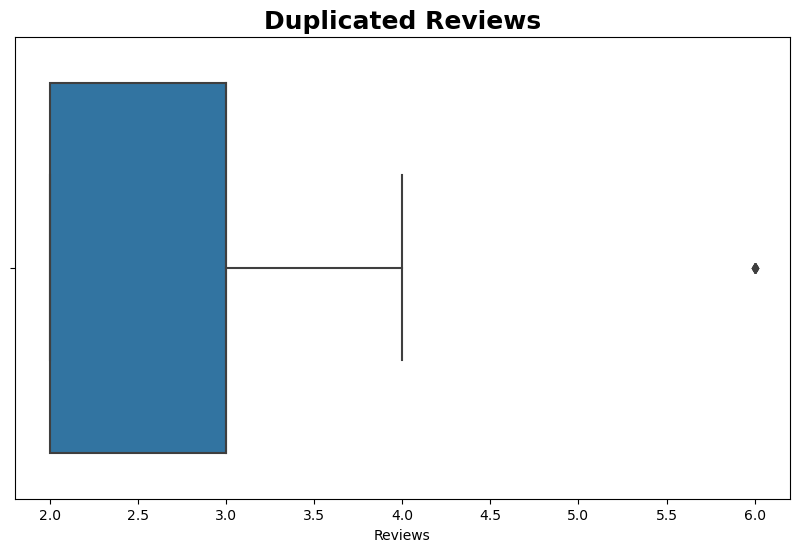

In [44]:
count_reviews = raw_df['Review Text'].value_counts().reset_index()

fig = plt.figure(figsize = (10,6))
sns.boxplot(data = count_reviews[count_reviews['Review Text']>1], x ='Review Text')
# sns.countplot(data = count_reviews[count_reviews['Review Text']>1], x ='Review Text')
plt.title('Duplicated Reviews', fontsize = 18, weight = 600)
plt.xlabel('Reviews')
plt.show()

In [45]:
duplicate_sample = count_reviews[count_reviews['Review Text']>1].loc[0,'index']
raw_df.loc[raw_df['Review Text'] == duplicate_sample,['Product Name', 
                                                      'Product Brand', 
                                                      'Review Author', 
                                                      'Review Text', 
                                                      'Classified Text Label']]

Product Name  \
292            Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
293  Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
691            Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
692            Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
694  Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
695  Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   

      Product Brand Review Author  \
292  Wandering Bear   Adrienne S.   
293  Wandering Bear   Adrienne S.   
691  Wandering Bear   Adrienne S.   
692  Wandering Bear   Adrienne S.   
694  Wandering Bear   Adrienne S.   
695  Wandering Bear   Adrienne S.   

                                                                                                                                                      Review Text  \
292  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   
293  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   
691  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   
692  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   
694  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   
695  The flavor is smooth and tastes great with your milk/creamer of choice. Premium coffee for a fraction of what you would pay at a coffee house for Cold Brew.   

    Classified Text Label  
292       Adrenaline Drip  
293       Adrenaline Drip  
691         Sumptuous Joy  
692       Creative Elixir  
694         Sumptuous Joy  
695       Creative Elixir

In [46]:
cleaned_df = raw_df.drop_duplicates(subset=['Product Name', 'Product Brand', 'Review Author', 'Review Text', 'Classified Text Label'])
display(cleaned_df)

ASIN  \
0     B084BN18SL   
1     B01GW3M6EQ   
2     B07CZ37V8N   
3     B0BPJZ18NS   
4     B089CDP1RK   
...          ...   
1548  B07SX9WJ42   
1549  B07SX9WJ42   
1550  B07SX9WJ42   
1551  B07SX9WJ42   
1552  B07SX9WJ42   

                                                                                                                                                                                              Product Name  \
0                                                                                                                              Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2               Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                 Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4     Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
...                                                                                                                                                                                                    ...   
1548                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1549                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1550                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1551                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
1552                               Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   

                   Product Brand                             Product URL  \
0     Black Rifle Coffee Company    https://www.amazon.com/dp/B084BN18SL   
1               High Brew Coffee    https://www.amazon.com/dp/B01GW3M6EQ   
2                 Wandering Bear    https://www.amazon.com/dp/B07CZ37V8N   
3                       Alani Nu    https://www.amazon.com/dp/B0BPJZ18NS   
4                 Wandering Bear    https://www.amazon.com/dp/B089CDP1RK   
...                          ...                                     ...   
1548                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1549                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1550                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1551                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   
1552                GROWER'S CUP  https://www.amazon.co.uk/dp/B07SX9WJ42   

      Price                                                        Image URL  \
0      2.83              https://m.media-amazon.com/images/I/41fpEripKwL.jpg   
1     25.28     https://m.media-amazon.com/images/I/81X2Q20fCcL._SL1500_.jpg   
2     39.99     https://m.media-amazon.com/images/I/719w5rgTvzL._SL1500_.jpg   
3     22.99     https://m.media-amazon.com/images/I/71WHnwGJMwL._

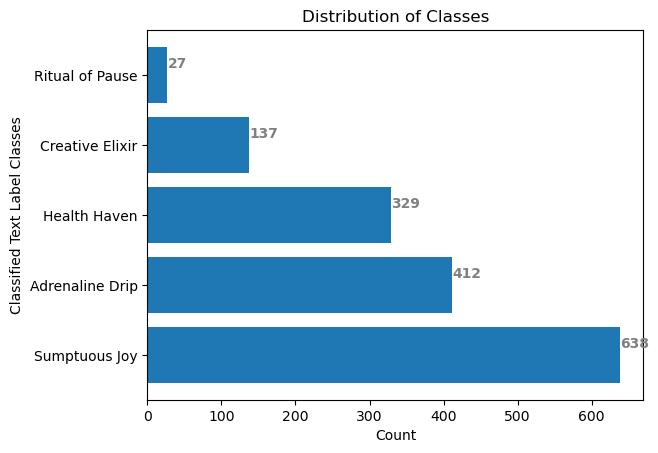

In [47]:
# "Classified Text Label" is our target class labels
label_counts = cleaned_df['Classified Text Label'].value_counts()
plt.rcdefaults()
fig, ax = plt.subplots()
plt.barh(label_counts.index, label_counts, align='center')

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

plt.xlabel("Count")
plt.ylabel("Classified Text Label Classes")
plt.title("Distribution of Classes")
plt.show()

In [48]:
# target distribution
cleaned_df['Classified Text Label'].value_counts(normalize=True)

Sumptuous Joy      0.413480
Adrenaline Drip    0.267012
Health Haven       0.213221
Creative Elixir    0.088788
Ritual of Pause    0.017498
Name: Classified Text Label, dtype: float64

## Create a sentiment label for each review text

In [49]:
# Function to determine review rating
def review_sentiment(rating):
    if rating == 4 or rating == 5:
        return 'pos'
    elif rating == 3:
        return 'neu'
    elif rating == 1 or rating == 2:
        return 'neg'
    else:
        return 'invalid'

# Apply the function to create a new column
cleaned_df['Review_Sentiment'] = cleaned_df['Review Rating'].apply(review_sentiment)
display(cleaned_df.head(20))

ASIN  \
0   B084BN18SL   
1   B01GW3M6EQ   
2   B07CZ37V8N   
3   B0BPJZ18NS   
4   B089CDP1RK   
5   B00V57E8ZA   
6   B08T7V7YNH   
7   B08D516KNK   
8   B0BTZ96CNQ   
9   B084BN18SL   
10  B0BTZ96CNQ   
11  B0788DWH4Q   
12  B0BTZ96CNQ   
13  B00V57E8ZA   
14  B0BTZ96CNQ   
15  B07W19KKGQ   
16  B0BTZ96CNQ   
17  B0BTZ96CNQ   
18  B08L4KNBV6   
19  B07FZ14VQL   

                                                                                                                                                                                                                    Product Name  \
0                                                                                                                                                    Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                      High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                     Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                       Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                           Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                      Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                      Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                               Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8   Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                    Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
10  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
11                                                                                                RISE Brewing Co. Original Black Nitro Cold Brew Coffee, Sugar, Vegan, Organic & Non-GMO, Low Acidity, 7 fl. oz. Cans (12 Pack)   
12  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
13                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
14  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz

In [50]:
# check review sentiment distribution
cleaned_df['Review_Sentiment'].value_counts()

pos    1446
neu      67
neg      30
Name: Review_Sentiment, dtype: int64

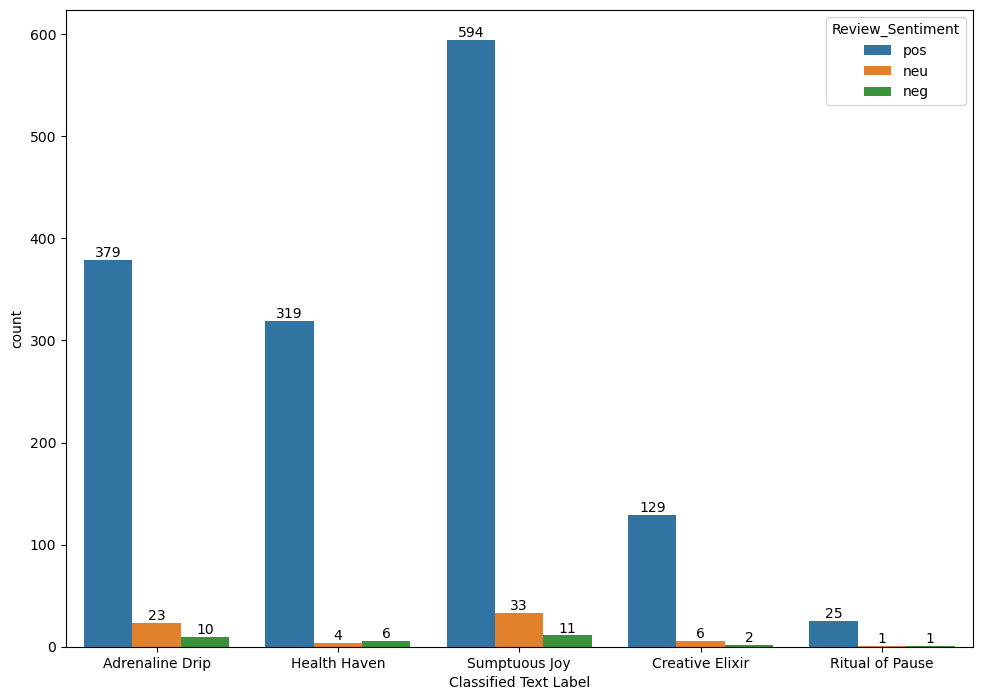

In [51]:
fig, ax = plt.subplots()
# the size of figure
fig.set_size_inches(11.7, 8.27)

ax = sns.countplot(data = cleaned_df, x ='Classified Text Label', hue='Review_Sentiment')
for container in ax.containers:
    ax.bar_label(container)

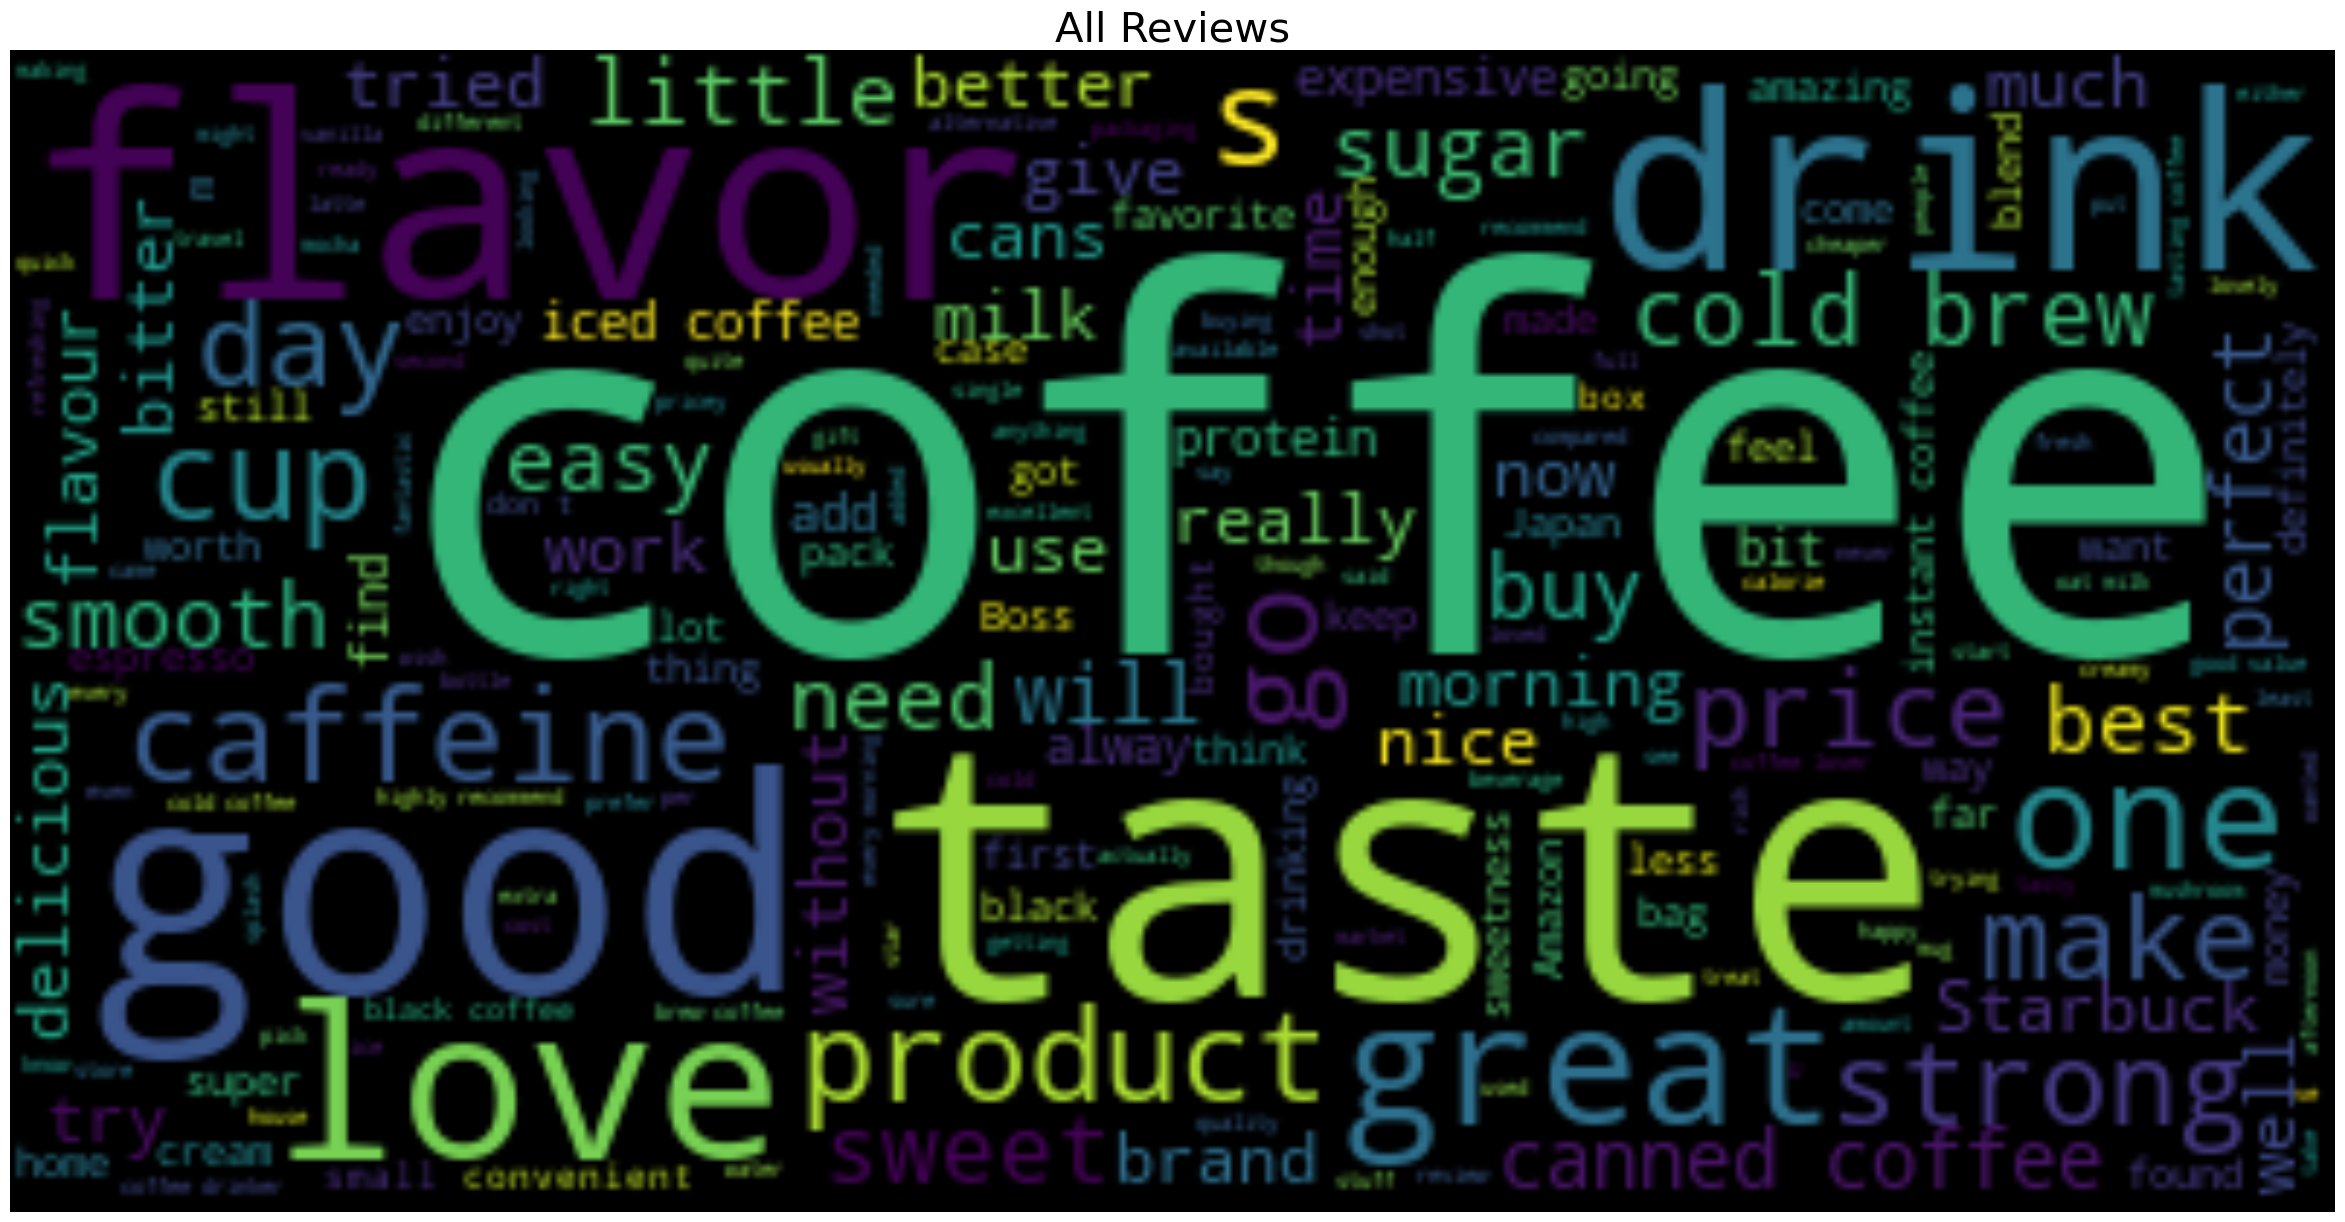

In [52]:
# Create stopword list for wordcloud visualization:
stopwords = set(STOPWORDS)
#stopwords.update(["flight", "united", "VirginAmerica", "t", "co", "u"])

# Generate wordcloud for overall review text
text_ALL = " ".join(review for review in cleaned_df["Review Text"])
wordcloud = WordCloud(stopwords=stopwords).generate(text_ALL)

plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('All Reviews', fontsize=30)
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

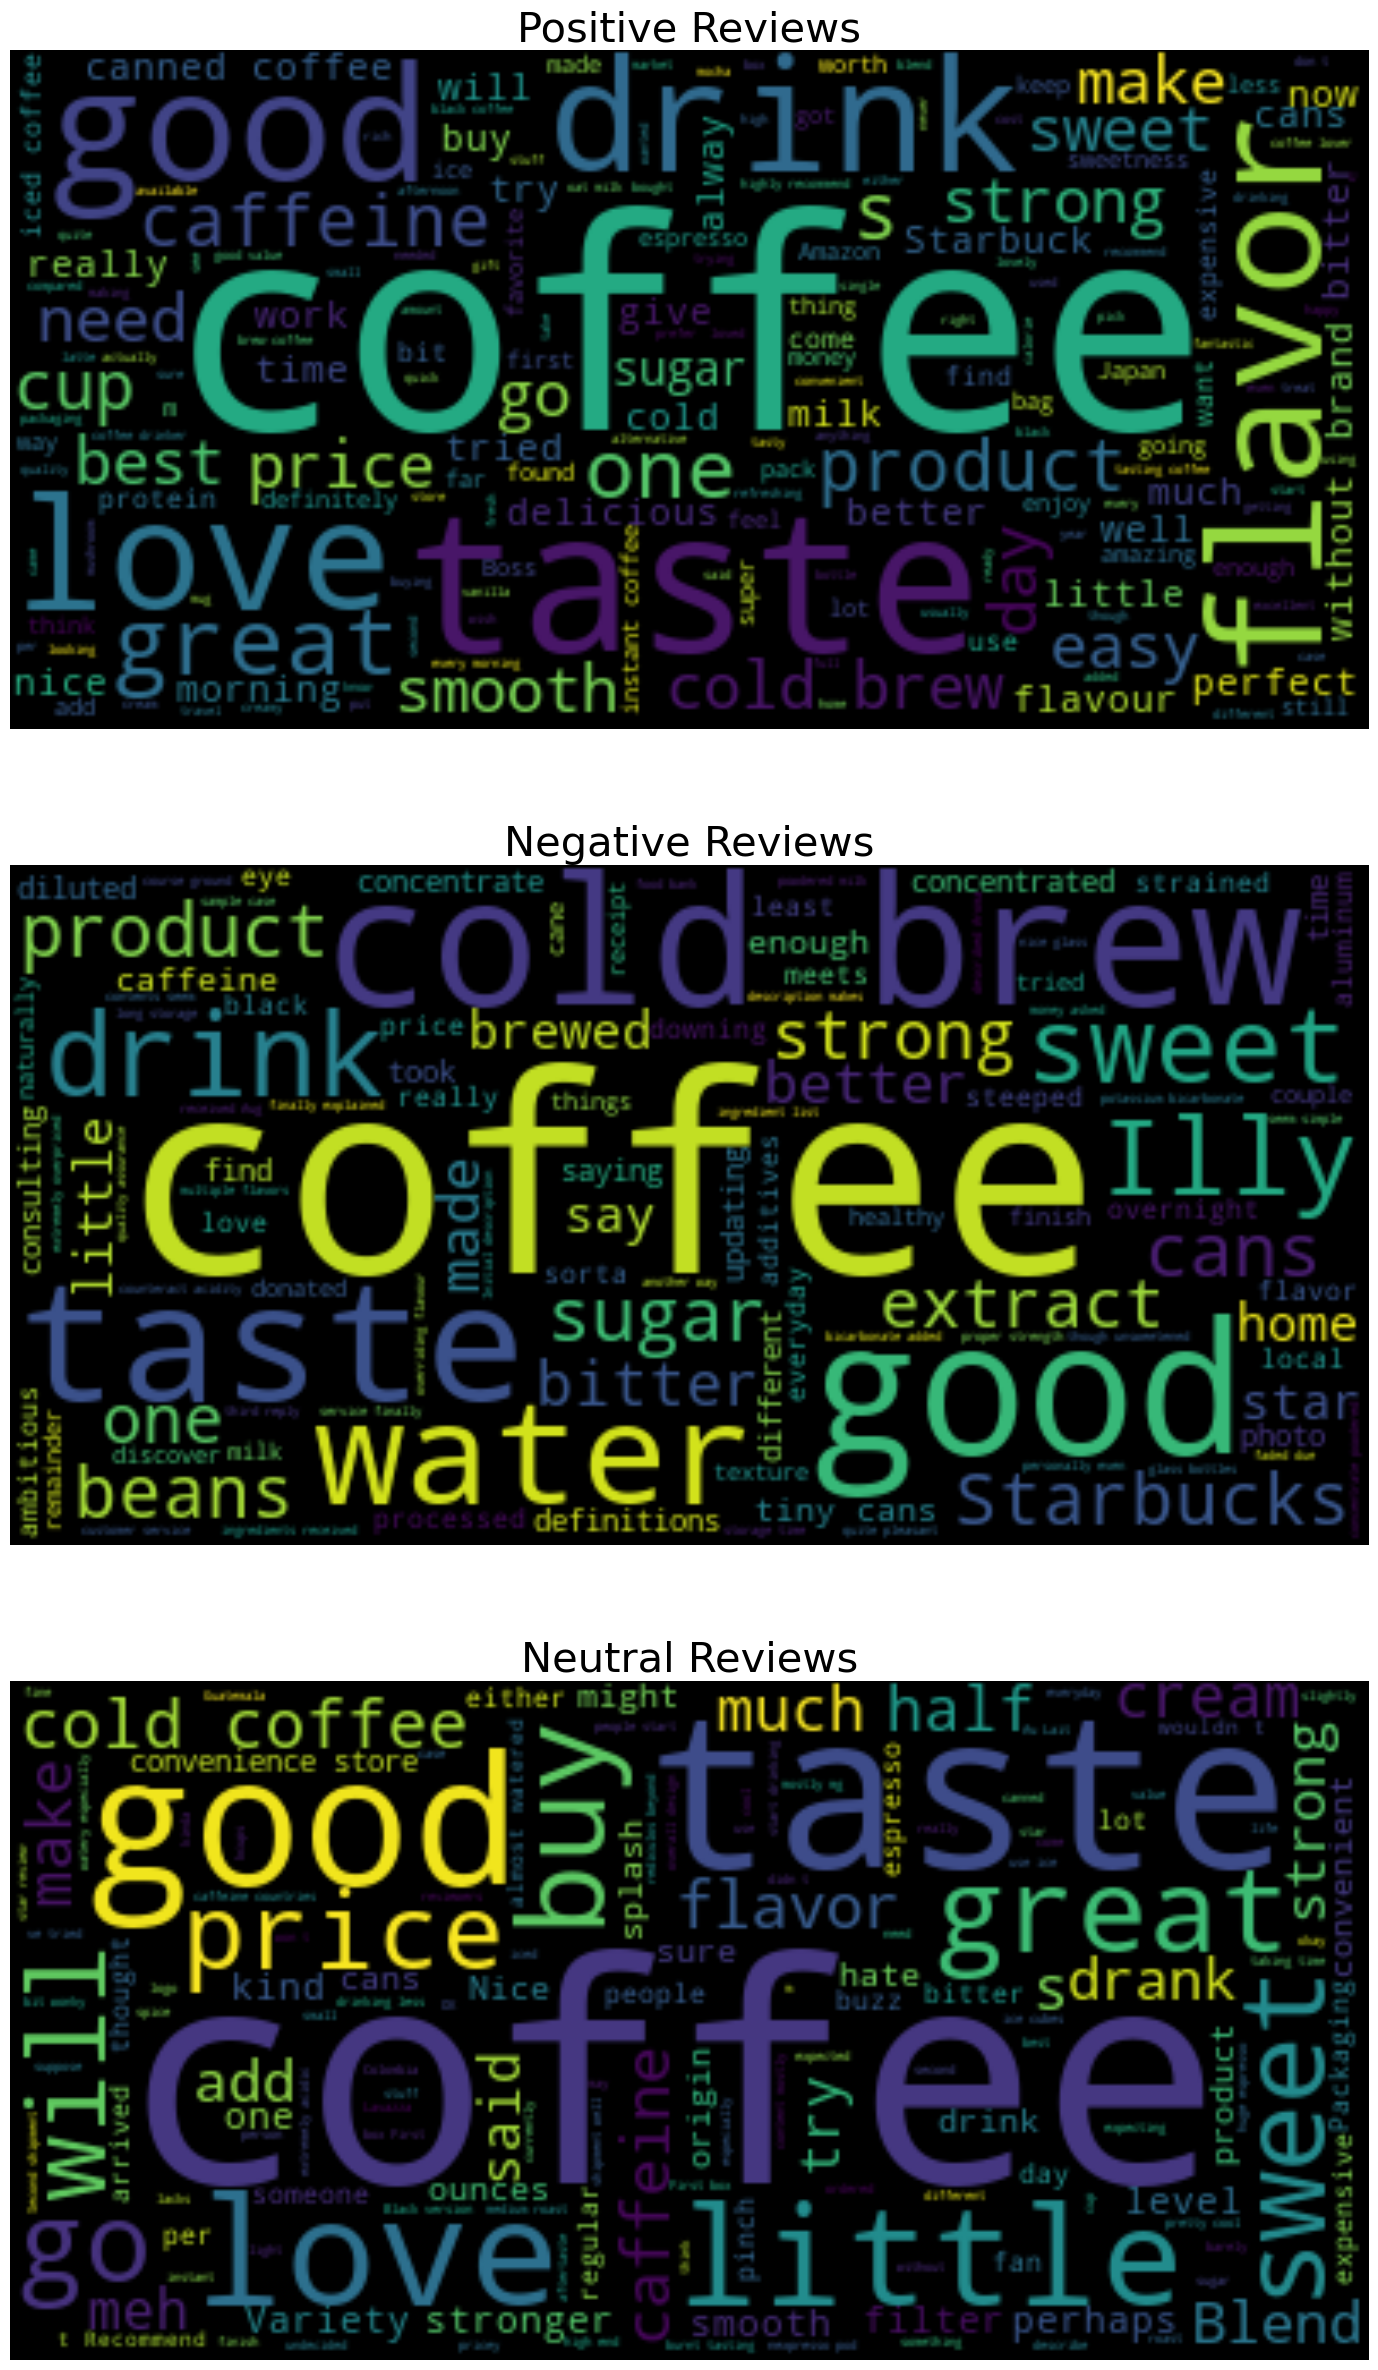

In [53]:
# Generate wordcloud for positive, negative, and neutral tweets respectively
df_POS = cleaned_df[cleaned_df['Review_Sentiment']=='pos']
df_NEG = cleaned_df[cleaned_df['Review_Sentiment']=='neg']
df_NEU = cleaned_df[cleaned_df['Review_Sentiment']=='neu']

review_POS = " ".join(review for review in df_POS["Review Text"])
review_NEG = " ".join(review for review in df_NEG["Review Text"])
review_NEU = " ".join(review for review in df_NEU["Review Text"])

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
wordcloud_POS = WordCloud(stopwords=stopwords).generate(review_POS)
wordcloud_NEG = WordCloud(stopwords=stopwords).generate(review_NEG)
wordcloud_NEU = WordCloud(stopwords=stopwords).generate(review_NEU)


# Display the generated image:
ax[0].imshow(wordcloud_POS, interpolation='bilinear')
ax[0].set_title('Positive Reviews', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_NEG, interpolation='bilinear')
ax[1].set_title('Negative Reviews',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NEU, interpolation='bilinear')
ax[2].set_title('Neutral Reviews',fontsize=30)
ax[2].axis('off')

In [54]:
df = cleaned_df[['Product Name', 'Product Brand', 'Review Text', 'Detected Language', 'Review_Sentiment']]
display(df.sample(50))
display(df.shape)

Product Name  \
883    Chamberlain Coffee Variety Box Single Serve Bags, Includes All 5 Blends of Our Single Serving Coffee Packets, Original Family Blend, Early Bird Blend, Night Owl Blend, Careless Cat Blend, Social Dog Blend, 10 Total Bags   
20                                             Loco Coffee Oat Milk Latte Cold Brew Coffee [Vanilla Honey] 11 Ounce Can, 12 Count | Medium Roast, 180mg Caffeine | Gluten Free and Dairy Free | Low Sugar, Low Calorie Iced Coffee   
433                                                                 Illy Ready to Drink Coffee CLASSICO Cold Brew, Authentic Italian Coffee, Made with 100% Arabica Coffee, All-Natural, No Preservatives, 8.45 Fl Oz (Pack of 12)   
205                                                        BOSS Coffee by Suntory - Japanese Flash Brew Coffee with Milk, 8oz 12 Pack, Imported from Japan, Au Lait, Espresso Doubleshot, Ready to Drink, Contains Milk, No Gluten   
349                                                                                Javy Premium Instant Coffee - Protein Coffee - Protein Shake, Iced Coffee, Protein Drinks, Delicious Keto Friendly and Gluten Free, 24 Servings   
815                                                     Cafetinto Organic Instant Coffee Cubes 9 Pieces | Colombian Coffee & All Natural Panela Coffee Cubes | Naturally Sourced | Provides Natural Nutrients, Vitamins & Minerals   
334                                            Loco Coffee Oat Milk Latte Cold Brew Coffee [Vanilla Honey] 11 Ounce Can, 12 Count | Medium Roast, 180mg Caffeine | Gluten Free and Dairy Free | Low Sugar, Low Calorie Iced Coffee   
451                                                                                                 RISE Brewing Co. Original Black Nitro Cold Brew Coffee, Sugar, Vegan, Organic & Non-GMO, Low Acidity, 7 fl. oz. Cans (12 Pack)   
417                                                                                                                                                               Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
1122                      La Colombe Variety Pack Draft Latte - 9 Fl. Oz. 12 Pack - Double, Triple, Mocha, & Vanilla, 100% Arabica, Single-Origin, Brazilian Cold Brew Coffee with Lactose-Free Foamy Milk, 120mg Natural Caffeine   
1017                                                                                                                                                    La Colombe Draft Latte Cold-Pressed Espresso Variety 9 oz Can (Pack of 12)   
152                                                        BOSS Coffee by Suntory - Japanese Flash Brew Coffee with Milk, 8oz 12 Pack, Imported from Japan, Au Lait, Espresso Doubleshot, Ready to Drink, Contains Milk, No Gluten   
960                                            Loco Coffee Oat Milk Latte Cold Brew Coffee [Vanilla Honey] 11 Ounce Can, 12 Count | Medium Roast, 180mg Caffeine | Gluten Free and Dairy Free | Low Sugar, Low Calorie Iced Coffee   
1287                                                                                                                              STARBUCKS Caramel Macchiato by Nescafé Dolce Gusto Coffee Pods 6 x 12 (72 Capsules, 36 Servings)   
97                                                         Travel Coffee for The Coffee Lover, Brew 6 Cups of Hand Roasted Specialty Coffee on The go and as Travel Back-Pack. Enjoy Fresh Rich Specialty Coffee Anywhere, Anytime   
28    Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
344                                                                                Javy Premium Instant Coffee - Protein Coffee - Protein Shake, Iced Coffee, Protein Drinks, Delicious Keto Friendly and Gluten Free, 24 Servings   
1022                                                                      

(1543, 5)

In [55]:
# check language distribution
df['Detected Language'].value_counts()

en    1510
pt       6
de       6
ja       6
sv       3
uk       2
ta       2
fr       2
ru       2
zh       2
it       1
fi       1
Name: Detected Language, dtype: int64

In [56]:
# Filter rows to keep en & uk languages only
df = df[(df["Detected Language"] == 'en') | (df["Detected Language"] == 'uk')]
display(df['Detected Language'].value_counts())
display(df.shape)

en    1510
uk       2
Name: Detected Language, dtype: int64

(1512, 5)

# Text Cleaning

## Remove Punctuations

In [57]:
pd.set_option("max_colwidth", None)

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['text_punct'] = df['Review Text'].apply(lambda x: remove_punct(x))
df.head(10)

Product Name  \
0                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                     High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                    Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                      Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                          Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                     Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                              Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   

                Product Brand  \
0  Black Rifle Coffee Company   
1            High Brew Coffee   
2              Wandering Bear   
3                    Alani Nu   
4              Wandering Bear   
5           Jay Street Coffee   
6      Starbucks - RTD Coffee   
7        Taylors of Harrogate   
8                       Taika   
9  Black Rifle Coffee Company   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                This coffee is as good as it comes for can coffee. It's so good and just enough energy   
1                                              

## Tokenization

In [58]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text_tokenized'] = df['text_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

Product Name  \
0                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                     High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                    Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                      Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                          Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                     Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                              Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   

                Product Brand  \
0  Black Rifle Coffee Company   
1            High Brew Coffee   
2              Wandering Bear   
3                    Alani Nu   
4              Wandering Bear   
5           Jay Street Coffee   
6      Starbucks - RTD Coffee   
7        Taylors of Harrogate   
8                       Taika   
9  Black Rifle Coffee Company   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                This coffee is as good as it comes for can coffee. It's so good and just enough energy   
1                                              

## Remove stopwords

In [59]:
from nltk.corpus import stopwords

# A list of English stopwords in NLTK
stopword = stopwords.words('english')

#print(stopword)

# Can extend the stopword list here
#stopword.extend(['must', 'every'])

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['text_nonstop'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

Product Name  \
0                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                     High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                    Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                      Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                          Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                     Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                              Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   

                Product Brand  \
0  Black Rifle Coffee Company   
1            High Brew Coffee   
2              Wandering Bear   
3                    Alani Nu   
4              Wandering Bear   
5           Jay Street Coffee   
6      Starbucks - RTD Coffee   
7        Taylors of Harrogate   
8                       Taika   
9  Black Rifle Coffee Company   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                This coffee is as good as it comes for can coffee. It's so good and just enough energy   
1                                              

## Stemming

In [60]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['text_stemmed'] = df['text_nonstop'].apply(lambda x: stemming(x))
df.head(10)

Product Name  \
0                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   
1                                                                                                                     High Brew Coffee, medium roast, Cold Brew, Double Espresso, 8 Fl Oz Can (Pack of 12) - Packaging May Vary   
2                                    Wandering Bear Straight Black Organic Cold Brew Coffee On Tap, 96 fl oz - Extra Strong, Smooth, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
3                                                                                      Alani Nu Protein Coffee, 100mg Caffeine, 10g Protein, Naturally Flavored, MAPLE DONUT, Only 90 Calories per 12 Fl Oz Bottle (Pack of 12)   
4                          Wandering Bear Straight Black Organic Cold Brew Coffee, 32 fl oz, 1 pack - Extra Strong, Smooth, Organic, Unsweetened, Shelf-Stable, and Ready to Drink Iced Coffee, Cold Brewed Coffee, Cold Coffee   
5                                                                                                                                                     Jay Street Coffee, Coffee Shot, Unsweetened Black, 6.4 Ounce (Pack of 20)   
6                                                                                                                                                     Starbucks Frappuccino Coffee Drink, Caramel, 13.7 fl oz Bottles (12 Pack)   
7                                                                                                                                                              Taylors of Harrogate Lazy Sunday Ground Coffee, 227g (Pack of 6)   
8  Taika Iced Latte Sampler - Ready to Drink Coffee and Matcha Latte in Cans - Matcha Latte, Macadamia Latte, Oat Milk Latte w/Ashwagandha, Lions Mane, & L-Theanine - 8 Fl Oz (Pack of 3) (Latte Sampler, 8 Fl Oz (Pack of 3))   
9                                                                                                                                                   Black Rifle Coffee Company RTD (Espresso with Cream, 11 Fl Oz (Pack of 12))   

                Product Brand  \
0  Black Rifle Coffee Company   
1            High Brew Coffee   
2              Wandering Bear   
3                    Alani Nu   
4              Wandering Bear   
5           Jay Street Coffee   
6      Starbucks - RTD Coffee   
7        Taylors of Harrogate   
8                       Taika   
9  Black Rifle Coffee Company   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                This coffee is as good as it comes for can coffee. It's so good and just enough energy   
1                                              

# Model Training

## Machine learning-based classifiers

## Split into train and test dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Review Text'], df['Review_Sentiment'], test_size=0.25, stratify=df['Review_Sentiment'], random_state=40)

print('Training:')
print('X: {} rows \nY: {} rows'.format(X_train.shape[0], y_train.shape[0]))
print('\nTesting')
print('X: {} rows \nY: {} rows'.format(X_test.shape[0], y_test.shape[0]))

Training:
X: 1134 rows 
Y: 1134 rows

Testing
X: 378 rows 
Y: 378 rows


### Naïve Bayes

In [62]:
nb_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('nb', MultinomialNB())])

nb_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [63]:
y_pred = nb_classifier.predict(X_test)
# nb_f1 = f1_score(y_pred, y_test, average='weighted', labels=np.unique(y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

nb_score = nb_classifier.score(X_test, y_test)
print("Accuracy:", nb_score)

              precision    recall  f1-score   support

         pos       0.94      1.00      0.97       355

   micro avg       0.94      1.00      0.97       355
   macro avg       0.94      1.00      0.97       355
weighted avg       0.94      1.00      0.97       355

Accuracy: 0.9391534391534392


### Random Forest

In [64]:
rfc_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('rfc', RandomForestClassifier())])
rfc_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rfc', RandomForestClassifier())])

In [65]:
y_pred = rfc_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

rfc_score = rfc_classifier.score(X_test, y_test)
print("Accuracy:", rfc_score)

              precision    recall  f1-score   support

         neg       1.00      0.62      0.77         8
         neu       1.00      0.73      0.85        15
         pos       0.98      1.00      0.99       355

    accuracy                           0.98       378
   macro avg       0.99      0.79      0.87       378
weighted avg       0.98      0.98      0.98       378

Accuracy: 0.9814814814814815


### Support Vector Machine

In [66]:
svm_classifier = Pipeline([('tfid',TfidfVectorizer(stop_words=stopword)), ('svc', LinearSVC())])
svm_classifier.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('svc', LinearSVC())])

In [67]:
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

svm_score = svm_classifier.score(X_test, y_test)
print("Accuracy:", svm_score)

              precision    recall  f1-score   support

         neg       1.00      0.62      0.77         8
         neu       1.00      0.73      0.85        15
         pos       0.98      1.00      0.99       355

    accuracy                           0.98       378
   macro avg       0.99      0.79      0.87       378
weighted avg       0.98      0.98      0.98       378

Accuracy: 0.9814814814814815


## Lexicon based approach

### TextBlob

In [68]:
# polarity describe the sentiment values
# -1 = negative, 1 = positive
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# subjectivity describe opinion is lean toward personal or rational
# the higher the score, the more personal opnion based
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
    if score <= -0.05:
        return 'neg'
    elif score >= 0.05:
        return 'pos'
    else:
        return 'neu'
    
df['textblob_subjectivity'] = df['text_punct'].apply(getSubjectivity)
df['textblob_polarity'] = df['text_punct'].apply(getPolarity)
df['textblob_prediction'] = df['textblob_polarity'].apply(getAnalysis)

In [69]:
df['textblob_match'] = np.where(df["Review_Sentiment"] == df["textblob_prediction"], True, False)
correct_guess = df['textblob_match'].value_counts()[True]
wrong_guess = df['textblob_match'].value_counts()[False]

accuracy = correct_guess / (df.shape[0])
print("Accuracy:", accuracy)

Accuracy: 0.7982804232804233


In [70]:
print(classification_report(df['Review_Sentiment'], df['textblob_prediction']))

              precision    recall  f1-score   support

         neg       0.14      0.27      0.18        30
         neu       0.03      0.11      0.05        62
         pos       0.96      0.84      0.89      1420

    accuracy                           0.80      1512
   macro avg       0.38      0.41      0.38      1512
weighted avg       0.90      0.80      0.85      1512



### VADER

In [71]:
analyser = SentimentIntensityAnalyzer()

def getVaderPolarity(text):
    return analyser.polarity_scores(text)

def getVaderAnalysis(score):
    if score['compound'] >= 0.05:
        return 'pos'
    elif score['compound'] <= -0.05:
        return 'neg'
    else:
        return 'neu'
    
df['vader_polarity'] = df['text_punct'].apply(getVaderPolarity)
df['vader_prediction'] = df['vader_polarity'].apply(getVaderAnalysis)

In [72]:
df['vader_match'] = np.where(df["Review_Sentiment"] == df["vader_prediction"], True, False)
correct_guess = df['vader_match'].value_counts()[True]
wrong_guess = df['vader_match'].value_counts()[False]

accuracy = correct_guess / (df.shape[0])
print("Accuracy:", accuracy)

Accuracy: 0.8551587301587301


In [73]:
print(classification_report(df['Review_Sentiment'], df['vader_prediction']))

              precision    recall  f1-score   support

         neg       0.18      0.33      0.24        30
         neu       0.07      0.15      0.10        62
         pos       0.96      0.90      0.93      1420

    accuracy                           0.86      1512
   macro avg       0.40      0.46      0.42      1512
weighted avg       0.90      0.86      0.88      1512



In [74]:
import pickle
pickle.dump(svm_classifier, open("review_sentiment.pkl", 'wb'))